**Name**: San Sit
<h3> (1) Data Description </h3>
<h4> Our given data is recording players' actions within Minecraft (Woods). My project will analyze the dataset players and their characteristics. </h4>

In *players*, there are 196 observations with 7 variables:
- `experience` (character): the level of expertise the player has within Minecraft separated (best to worst): Beginner, Regular, Amateur, Pro, and Veteran
- `subscribed`(boolean): whether the player is subscribed to newsletter
- `hashedEmail`(character): player's encrypted email (used for identification)
- `played_hours`(double): the amount of hours played by player
- `name`(character): name of the player
- `gender` (character): player's gender
- `Age`(double): player's age <br>

<h5> Possible issues: </h5>

- There are some NA values in `Age` and `gender` columns.
- Lack of information on what determines a player's `experience` categorization.
- Ambiguity on how `played_hours` was collected.

<h3> (2) Questions </h3>

**My broad question** - Question 1: Player characteristics and behaviors most predictive of subscribing to a game-related newsletter. <br>
**Specific** - "Can player experience level, total playtime, and age predict whether a player will subscribe to a game-related newsletter?"

Since my question only requires data from `players` dataframe, my data analysis will only utilize the `players` dataframe.

<h3> (3) Analysis and Visualization </h3>


In [1]:
library(tidyverse)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
# Importing players.csv and sessions.csv from my github list I uploaded to
# NOTE: sessions is imported solely for demonstration of the players and session data frames being able to be loaded into R
players <- read_csv("https://raw.githubusercontent.com/SansIt/ds-project/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/SansIt/ds-project/refs/heads/main/sessions.csv")

# Only players are needed for my analysis
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


The data seem tidy: each row - single observation, each column - single variable, and each value - single cell. 
Possible datatype improvements:

In [3]:
# Experience to factor (for comparisons later)
# Age to integer (as right now it is in double and a decimal age does not really help or make a difference in demographics)
# Let us also fix the capitalization of age as it is the only column/ variable whose first term is capitalized
players_fixed <- players |>
                mutate(experience = as_factor(experience)) |>
                mutate(age = as.integer(Age)) |>
                select(-Age)


In [4]:
# To compute the mean of each quantitative variable, there are only 2 (hours played and age):
players_mean <- players_fixed |>
            summarize(mean_age = mean(age, na.rm = TRUE), mean_played_hours = mean(played_hours)) 
players_mean

mean_age,mean_played_hours
<dbl>,<dbl>
20.52062,5.845918


For visualization, I choose the main target variable as boolean `subscribed` versus:
- `age` and `played_hours` as histograms (distribution of quantitative)
- `experience` level as a bar chart (comparison of category amounts)

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message in scale_x_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


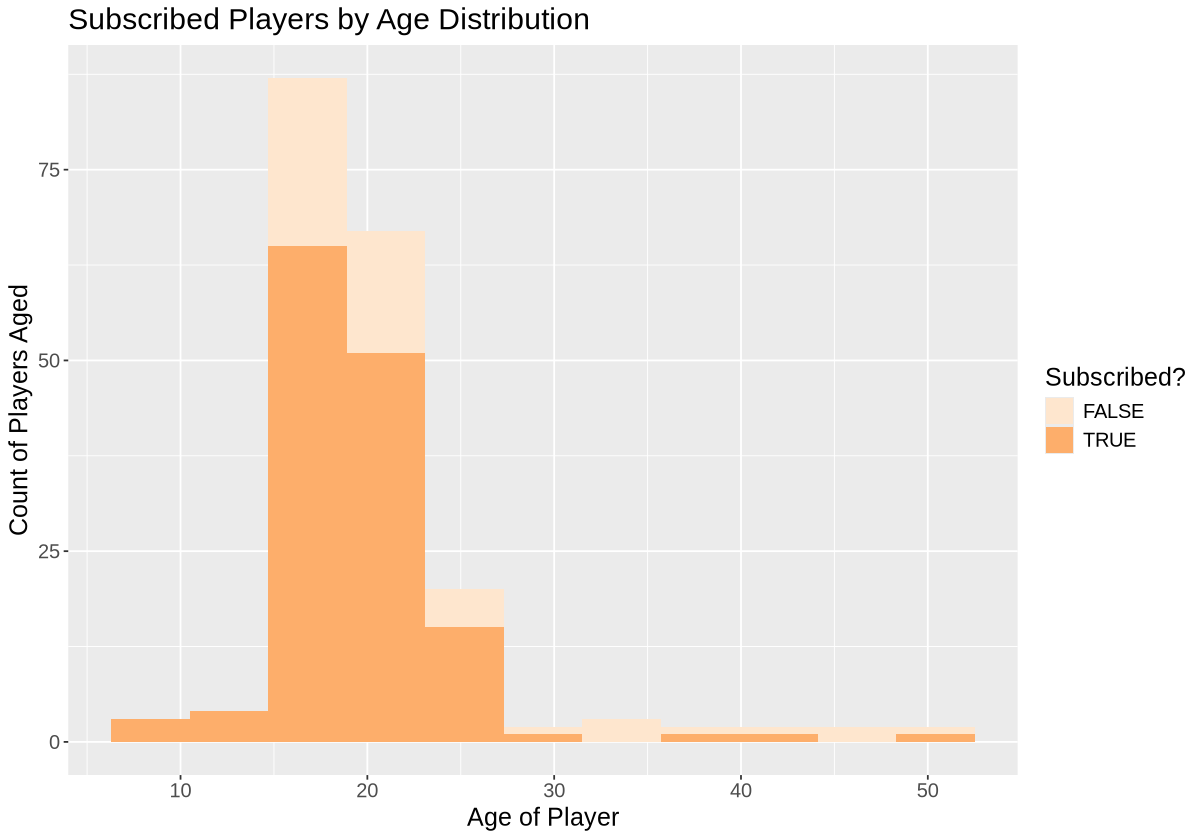

`summarise()` has grouped output by 'subscribe'. You can override using the
`.groups` argument.


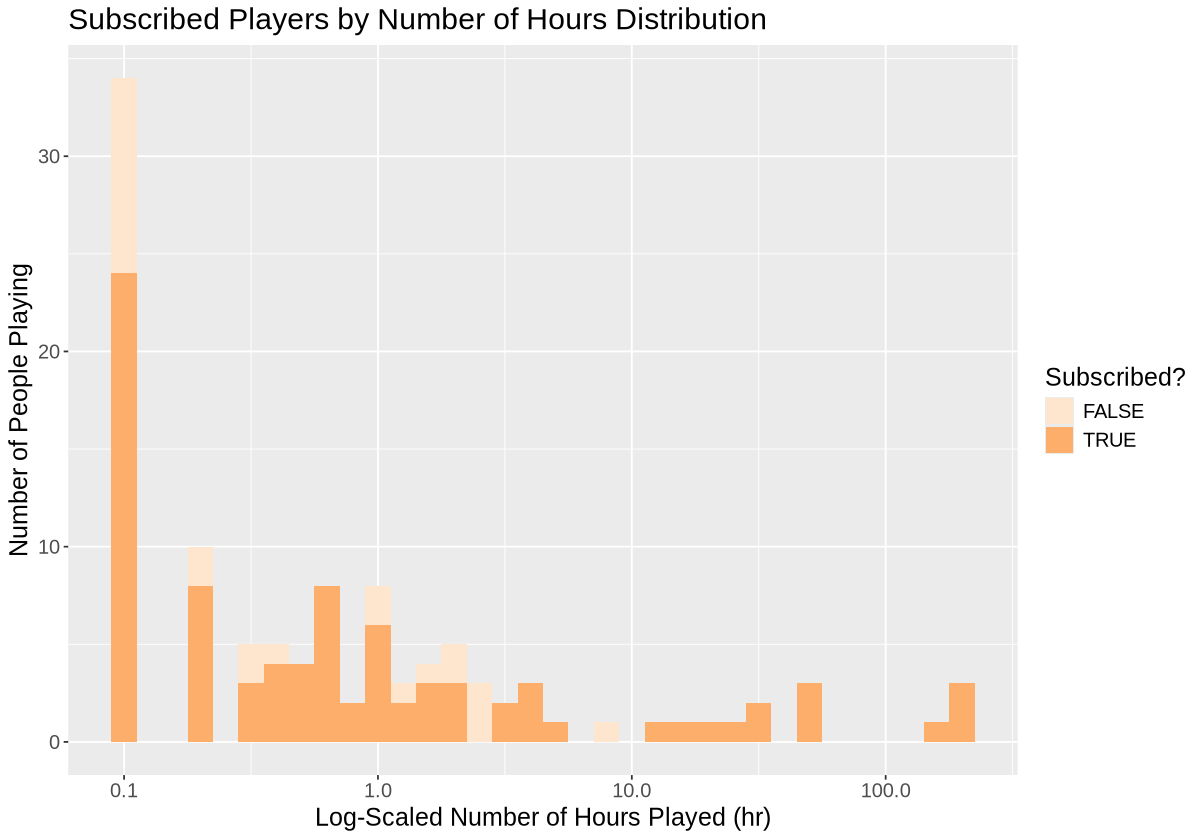

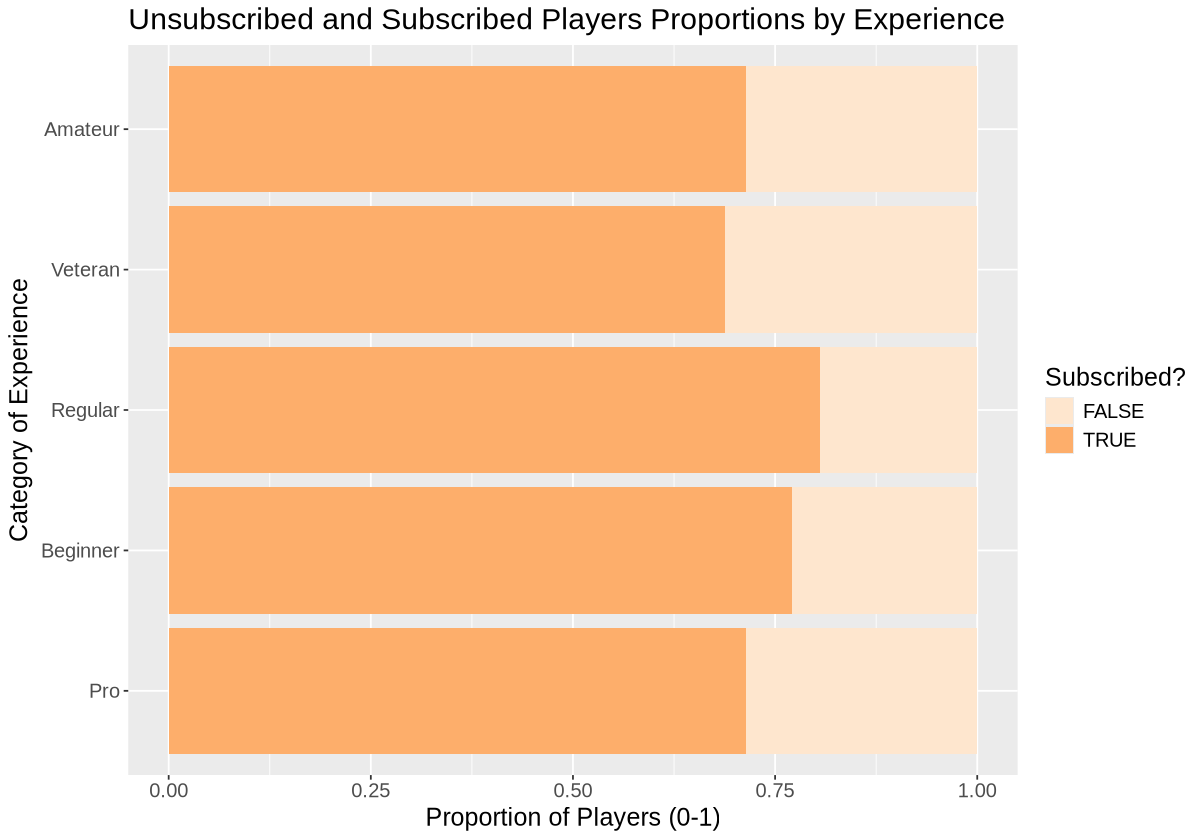

In [5]:
options(repr.plot.width = 10, repr.plot.height = 7)
# For the quantitative variables
# Ensuring they are colour-blind friendly
# Histograms are the best visualization in distributing quantitative data and filling by subscribed or not
age_plot <- players_fixed |>
                    ggplot(aes (x = age, fill = subscribe)) +
                    geom_histogram(bins = 11) +
                    labs(x = "Age of Player", y = "Count of Players Aged", fill = "Subscribed?") +
                    ggtitle("Subscribed Players by Age Distribution") +
                    theme(text = element_text(size = 15)) +
                    scale_fill_brewer(palette = "Oranges")

# Scaled x-axis as one group of played hours heavily skewed the bar graph till the others were not visible
hours_plot <- players_fixed |>
                    ggplot(aes (x = played_hours, fill = subscribe)) +
                    geom_histogram(binwidth = 0.1) +
                    labs(x = "Log-Scaled Number of Hours Played (hr)", y = "Number of People Playing", fill = "Subscribed?") +
                    ggtitle("Subscribed Players by Number of Hours Distribution") +
                    scale_x_log10(labels = label_comma()) + 
                    theme(text = element_text(size = 15)) +
                    scale_fill_brewer(palette = "Oranges")

age_plot
hours_plot

# For categorical amounts, make a new summarized count for true and false
# Bar graphs are most effective for comparing amounts (in this case, by Experience)
# We use position = "fill" because we are interested in the proportion of how much each category of experience subscribes
players_experience <- players_fixed |>
                group_by(subscribe, experience) |>
                summarize(count = n())
players_experience_plot <- players_experience |>
                    ggplot(aes (x = count, y = fct_reorder(experience, count), fill = subscribe)) +
                    geom_bar(stat = "identity", position = "fill") +
                    labs(x = "Proportion of Players (0-1)", y = "Category of Experience", fill = "Subscribed?") +
                    ggtitle("Unsubscribed and Subscribed Players Proportions by Experience") +
                    theme(text = element_text(size = 15)) + 
                    scale_fill_brewer(palette = "Oranges")

players_experience_plot 


#### Graph Analysis:
- `age`: Younger players are more likely to subscribe, with most subscribers in their late teens to early twenties (Elders do not).
- `played_hours`: Subscription status varies across playtime levels but is guaranteed for moderate-to-high playtime.
- `Experience`: Experience shows a trend where *Regular* and *Beginner* players subscribe notably most. <br>
`Age` and `Experience` seem strong predictors, while `played_hours` is decent but requires further analysis/ standardization.


### (4) Methods and Plans
I propose using **k-Nearest Neighbors (k-NN)** classification because it's the most intuitive for categorical prediction problems and identifying patterns using both numerical and categorical data.

**My predictor variables**:
- `experience` (Categorical)
- `age` (Quantitative)
- `played_hours` (Quantitative)

#### Assumptions Required
- Since k-NN relies on distance, we assume our dataset is unstandardized and have to normalize numerical quantities.
- Dataset should not skew toward a majority range, but early data suggests overrepresentation in specific `age` and `played_hours` ranges.

#### Weaknesses
- The `age` variable is slightly imbalanced, with a dominant 0-25 range, which may bias predictions based on the range's trends.
- `played_hours` has the same problem with a range 0-10 hours played.
- Too many predictor variables can make k-NN less effective if some chosen predictors are less reliable.

#### Processing, Comparing, Selecting
- Preprocessing includes standardization and handling missing values (NA).
- To ensure reliable model fitting,:
  1. Split the data into training and testing, with an 80-20% split, stratifying by `subscribe`.
  2. Use 10-fold cross-validation to determine the best number of neighbours and train the model on both sets.
  3. Evaluate our model on the testing data and collect metrics.

Prioritizing **high precision** is the key, as the newsletter would benefit more from identifying which characteristics subscribe more correctly (for more effective marketing campaigns) rather than maximizing subscriber identification (recall) or general proportion of correctness (accuracy).
